# Get Tags

## 1. Create a list of all tags {'tag' : frequency}

Extract tags from profiles data files and create a list of tags and frequencies.

In [1]:
import json
import os
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Profile data files containing tags
base_dir = os.path.abspath("..")  # go one level back to root
general_profiles = os.path.join(base_dir, "data", "scraped_data", "general_profiles_data.json")
profiles_by_comm = os.path.join(base_dir, "data", "scraped_data", "profiles_by_comm_data.json")
output_path = os.path.join(base_dir, "data", "tag_clustering", "all_tags.json")

all_tags = []

with open(general_profiles, "r", encoding="utf-8") as file:
    profiles = json.load(file)

    for profile in profiles.values():
        all_tags.extend(profile.get("tags", []))

with open(profiles_by_comm, "r", encoding="utf-8") as file:
    profiles_by_comm = json.load(file)

    for community in profiles_by_comm.values():
        for profile in community.values():
            all_tags.extend(profile.get("tags", []))

# Remove 'N/A' tag values
all_tags = [tag for tag in all_tags if tag != "N/A"]

# Count tag frequencies and save to JSON
tag_counts = dict(Counter(all_tags))

with open(output_path, "w", encoding="utf-8") as out:
    json.dump(tag_counts, out, indent=4)

print(f"Total unique tags (excluding 'N/A'): {len(tag_counts)}")
print(f"Saved to: {output_path}")

Total unique tags (excluding 'N/A'): 2965
Saved to: C:\Users\nastya\thesis\tum-thesis\data\tag_clustering\all_tags.json


## 2. Filter Tags based on Frequency

### 2.1 Distribtuion of Tag Frequencies

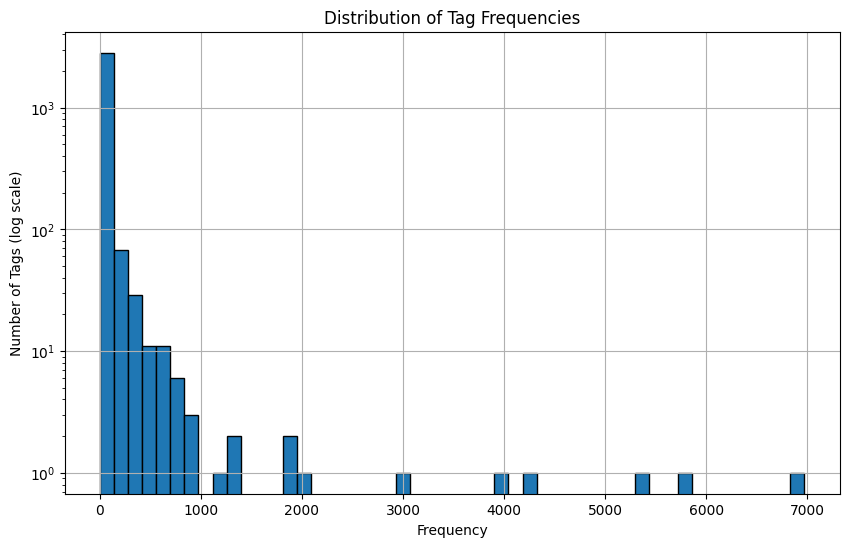

In [2]:
# Get list of frequencies
frequencies = list(tag_counts.values())

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(frequencies, bins=50, edgecolor='black', log=True) # log=True (logarithmic scale) if many rare tags
plt.title("Distribution of Tag Frequencies")
plt.xlabel("Frequency")
plt.ylabel("Number of Tags (log scale)")
plt.grid(True)
plt.show()

### 2.2 Statistics

In [55]:
# General statistics
print("\n--- Frequency Statistics ---")
print(df["Frequency"].describe())

# Top-N tags 
n = 30
df = pd.DataFrame(tag_counts.items(), columns=["Tag", "Frequency"])
top_tags = df.sort_values(by="Frequency", ascending=False).head(n)
print(f"\n--- Top {n} Tags--- :")
print(top_tags.to_string(index=False))

# Rare tags
print("\n--- Rare Tags ---")
for threshold in [1, 2, 3, 4, 5, 6, 7, 10, 20, 30, 40, 50, 60, 70]:
    percent = (df["Frequency"] <= threshold).mean() * 100
    count = (df["Frequency"] <= threshold).sum()
    print(f"Tags with ≤ {threshold} occurrences: {count} ({percent:.2f}%)")


--- Frequency Statistics ---
count    2965.000000
mean       41.792243
std       251.206527
min         1.000000
25%         2.000000
50%         6.000000
75%        19.000000
max      6970.000000
Name: Frequency, dtype: float64

--- Top 30 Tags--- :
                                            Tag  Frequency
                                  healthyeating       6970
                                        fitness       5729
                                    Ageing well       5411
                                 Women's health       4320
                                     weightloss       4031
                                  Sleep hygiene       3007
                                        Anxiety       2012
                                   Men's health       1944
           Underactive thyroid (hypothyroidism)       1857
                            Clinical depression       1376
                                   Fibromyalgia       1269
                                Prostate

High variance (std)<br>
25% of tags appear 2 times or fewer (1st quartile)<br>
50% of tags appear 6 times or fewer (median)<br>
75% of tags appear 19 times or fewer (3rd quartile)<br>
Most frequent tag appears 6970 times: healthyeating<br>

To determine what percentile a cutoff value corresponds to, check what percentage of values fall below this value.

###  2.3 60th percentile (frequency < 10)

In [50]:
freq_series = pd.Series(tag_counts)  # convert to Series

# Frequency values at every 5th percentile
print("--- Frequency by Percentiles ---")
print(freq_series.quantile([x / 100 for x in range(0, 101, 5)]).round().astype(int))

--- Frequency by Percentiles ---
0.00       1
0.05       1
0.10       1
0.15       1
0.20       2
0.25       2
0.30       3
0.35       3
0.40       4
0.45       5
0.50       6
0.55       7
0.60       9
0.65      12
0.70      15
0.75      19
0.80      27
0.85      39
0.90      64
0.95     130
1.00    6970
dtype: int32


In [59]:
# Get 60th percentile threshold (frequency < 10)
threshold = np.percentile(freq_series.values, 60)
print(f"60th percentile frequency threshold: {threshold:.2f}")

# Filter out tags below threshold
tag_counts_filtered = {}
for tag, count in tag_counts.items():
    if count >= threshold:
        tag_counts_filtered[tag] = count

all_tags_filtered = os.path.join(base_dir, "data", "tag_clustering", "all_tags_filtered.json")
with open(all_tags_filtered, "w", encoding="utf-8") as out:
    json.dump(tag_counts_filtered, out, indent=4)

print(f"Tags remaining after filtering: {len(filtered_tag_counts)} out of {len(tag_counts)}")
print(f"Saved to {all_tags_filtered}")

60th percentile frequency threshold: 9.40
Tags remaining after filtering: 1186 out of 2965
Saved to C:\Users\nastya\thesis\tum-thesis\data\tag_clustering\all_tags_filtered.json


# Cluster Tags

In [ ]:
## 1. 